In [1]:
# The following code to create a dataframe and remove duplicated rows is always executed and acts as a preamble for your script: 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

TEST_YEAR = 2024
dataset = pd.DataFrame({'Expense Year': pd.Series(dtype='str'), 'Expense Month':pd.Series(dtype='str'), 'Expense Month Num': pd.Series(dtype='int'), 'Total YTD Expense': pd.Series(dtype='int'), 'Yearly Target Budget':pd.Series(dtype='int')})
dataset.loc[0] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Jan', 'Expense Month Num': 1, 'Total YTD Expense': 1000, 'Yearly Target Budget':15000}
dataset.loc[1] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Feb', 'Expense Month Num': 2, 'Total YTD Expense': 2000, 'Yearly Target Budget':10000}
dataset.loc[2] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Mar', 'Expense Month Num': 3, 'Total YTD Expense': 3000, 'Yearly Target Budget':10000}
dataset.loc[3] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Apr', 'Expense Month Num': 4, 'Total YTD Expense': 4000, 'Yearly Target Budget':10000}
dataset.loc[4] = {'Expense Year': TEST_YEAR, 'Expense Month': 'May', 'Expense Month Num': 5, 'Total YTD Expense': 5000, 'Yearly Target Budget':10000}
dataset.loc[5] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Jun', 'Expense Month Num': 6, 'Total YTD Expense': 6000, 'Yearly Target Budget':10000}
dataset.loc[6] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Jul', 'Expense Month Num': 7, 'Total YTD Expense': 7000, 'Yearly Target Budget':10000}
dataset.loc[7] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Aug', 'Expense Month Num': 8, 'Total YTD Expense': 8000, 'Yearly Target Budget':10000}
dataset.loc[8] = {'Expense Year': TEST_YEAR, 'Expense Month': 'Sep', 'Expense Month Num': 9, 'Total YTD Expense': 8100, 'Yearly Target Budget':10000}
dataset = dataset.drop_duplicates()

In [2]:
COLOR_BLUE = '#118dFF'
LIGHT_COLOR_BLUE = '#a0d1ff'
COLOR_RED = '#E66C37'
LIGHT_COLOR_RED = '#f5c4af'
Q1_MONTHS = ['01', '02', '03']
Q2_MONTHS = ['04', '05', '06']
Q3_MONTHS = ['07', '08', '09']
Q4_MONTHS = ['10', '11', '12']
MONTHS = [month for month in range(1,13)]
MONTHS_TEXT_DICT = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

YEAR = int(dataset['Expense Year'].iloc[0])
YEARLY_TARGET_BUDGET = dataset['Yearly Target Budget'].iloc[0]
yearly_expense_df = dataset.sort_values('Expense Month Num')

In [3]:
curr_year = int(str(datetime.now())[0:4])

future_months = []

#Determine the current month.
current_month = int(str(datetime.now())[5:7])

#We are looking at expense data for the current year. Therefore, determine current and future months.
if int(curr_year) == int(YEAR):
    
    #Determine all past months.
    x = yearly_expense_df[yearly_expense_df['Expense Month Num'] < current_month]['Expense Month Num']
    #Determine cumulative expenses for all past months.
    y = yearly_expense_df[yearly_expense_df['Expense Month Num'] < current_month]['Total YTD Expense']
    
    #Determine the trend line based on the past months only.
    coefficients = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coefficients)
    
    #Determine future months.
    future_months = [month for month in MONTHS if month > int(current_month)]

    #For current month, determine the predicted cumulative expense.
    pred_cum_curr_month_expense = int(trend_line(current_month))
    
    #For each future month, determine the predicted cumulative expense.
    for month in future_months:
        pred_cum_expense = int(trend_line(month))
        yearly_expense_df.loc[yearly_expense_df.shape[0]] = {'Expense Year': curr_year, 'Expense Month': MONTHS_TEXT_DICT[month], 'Expense Month Num': month, 'Total YTD Expense': pred_cum_expense, 'Yearly Target Budget': YEARLY_TARGET_BUDGET}

findfont: Font family 'DIN' not found.
findfont: Font family 'DIN' not found.
findfont: Font family 'DIN' not found.
findfont: Font family 'DIN' not found.
findfont: Font family 'DIN' not found.
findfont: Font family 'DIN' not found.
findfont: Font family 'DIN' not found.
findfont: Font family 'DIN' not found.


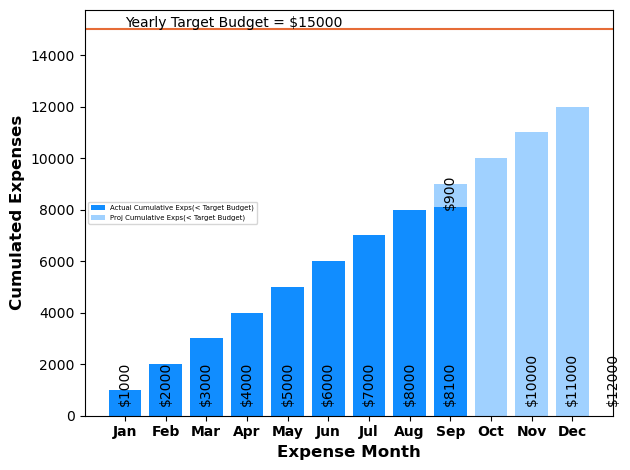

In [13]:
Y_POS = 500
ALT_Y_POS = 500
ACT_CUM_EXPS_BELOW_TARGET_BUDGET = 'Actual Cumulative Exps(< Target Budget)'
ACT_CUM_EXPS_ABOVE_TARGET_BUDGET = 'Actual Cumulative Exps(> Target Budget)'
PROJ_CUM_EXPS_BELOW_TARGET_BUDGET = 'Proj Cumulative Exps(< Target Budget)'
PROJ_CUM_EXPS_ABOVE_TARGET_BUDGET = 'Proj Cumulative Exps(> Target Budget)'

rotation_angle = 90

colour_label_dict = {}

for index, month_expense_row in yearly_expense_df.iterrows():
    
    #Determine current iteration's month.
    month = month_expense_row['Expense Month Num']
    
    #This month has not yet begun.
    if ((curr_year == YEAR) and (month in future_months)):

        #Determine cumulative expense up to the current quarter.
        cum_monthly_exp = month_expense_row['Total YTD Expense']
        
        if cum_monthly_exp > YEARLY_TARGET_BUDGET:
            if LIGHT_COLOR_BLUE not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET, color=LIGHT_COLOR_BLUE, label = PROJ_CUM_EXPS_BELOW_TARGET_BUDGET)
                colour_label_dict[LIGHT_COLOR_BLUE] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET, color=LIGHT_COLOR_BLUE)
            
            plt.text(x=MONTHS_TEXT_DICT[month], y=500, s='$'+str(YEARLY_TARGET_BUDGET), ha='center', rotation = rotation_angle)
            
            if LIGHT_COLOR_RED not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp - YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=LIGHT_COLOR_RED, label = PROJ_CUM_EXPS_ABOVE_TARGET_BUDGET)
                colour_label_dict[LIGHT_COLOR_RED] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp - YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=LIGHT_COLOR_RED)
                
            plt.text(x=MONTHS_TEXT_DICT[month], y=YEARLY_TARGET_BUDGET, s='$'+str(round(cum_monthly_exp - YEARLY_TARGET_BUDGET)), ha='center', rotation = rotation_angle)

        else:
            if LIGHT_COLOR_BLUE not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp, color=LIGHT_COLOR_BLUE, label = PROJ_CUM_EXPS_BELOW_TARGET_BUDGET)
                colour_label_dict[LIGHT_COLOR_BLUE] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp, color=LIGHT_COLOR_BLUE)
            plt.text(x=month, y=500, s='$'+str(round(cum_monthly_exp)), ha='center', rotation = rotation_angle)

    #This is the current month
    elif ((curr_year == YEAR) and (month == current_month)):
        
        #Determine cumulative expenses incurred upto this mount.
        cum_monthly_exp = month_expense_row['Total YTD Expense']
        
        #Cumulative expenses incurred thus far are greater than target budget
        if cum_monthly_exp > YEARLY_TARGET_BUDGET:
            if COLOR_BLUE not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET, color=COLOR_BLUE, label = ACT_CUM_EXPS_BELOW_TARGET_BUDGET)
                colour_label_dict[COLOR_BLUE] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET, color=COLOR_BLUE)
            
            plt.text(x=MONTHS_TEXT_DICT[month], y=500, s='$'+str(YEARLY_TARGET_BUDGET), ha='center', rotation = rotation_angle)

            if COLOR_RED not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp - YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=COLOR_RED, label = ACT_CUM_EXPS_ABOVE_TARGET_BUDGET)
                colour_label_dict[COLOR_RED] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp - YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=COLOR_RED)
                            
            plt.text(x=MONTHS_TEXT_DICT[month], y=YEARLY_TARGET_BUDGET, s='$'+str(round(cum_monthly_exp - YEARLY_TARGET_BUDGET)), ha='center', rotation = rotation_angle)
        
        else:
            if COLOR_BLUE not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp, color=COLOR_BLUE, label = ACT_CUM_EXPS_BELOW_TARGET_BUDGET)
                colour_label_dict[COLOR_BLUE] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp, color=COLOR_BLUE)
            plt.text(x=MONTHS_TEXT_DICT[month], y=500, s='$'+str(round(cum_monthly_exp)), ha='center', rotation = rotation_angle)
        
        if pred_cum_curr_month_expense > cum_monthly_exp:
            
            excess_prediction = pred_cum_curr_month_expense - cum_monthly_exp
            
            #Plot everything in blue since even the excess resulting from the prediction is within target.
            if pred_cum_curr_month_expense < YEARLY_TARGET_BUDGET:
                if LIGHT_COLOR_BLUE not in colour_label_dict.keys():
                    plt.bar(MONTHS_TEXT_DICT[month], excess_prediction, bottom=cum_monthly_exp, color=LIGHT_COLOR_BLUE, label=PROJ_CUM_EXPS_BELOW_TARGET_BUDGET)
                    colour_label_dict[LIGHT_COLOR_BLUE] = True
                else:
                    plt.bar(MONTHS_TEXT_DICT[month], excess_prediction, bottom=cum_monthly_exp, color=LIGHT_COLOR_BLUE)
                
                plt.text(x=MONTHS_TEXT_DICT[month], y=cum_monthly_exp, s='$'+str(round(excess_prediction)), ha='center', rotation = rotation_angle)

            #Even the expenses recorded so far ar greater than quarterly budget.
            elif cum_monthly_exp > YEARLY_TARGET_BUDGET:
                if LIGHT_COLOR_RED not in colour_label_dict.keys():
                    plt.bar(MONTHS_TEXT_DICT[month], excess_prediction, bottom=cum_monthly_exp, color=LIGHT_COLOR_RED, label=PROJ_CUM_EXPS_ABOVE_TARGET_BUDGET)
                    colour_label_dict[COLOR_RED] = True
                else:
                    plt.bar(MONTHS_TEXT_DICT[month], excess_prediction, bottom=cum_monthly_exp, color=LIGHT_COLOR_RED)
                
                plt.text(x=MONTHS_TEXT_DICT[month], y=pred_cum_curr_month_expense-200, s='$'+str(round(excess_prediction)), ha='center', rotation = rotation_angle)

            #Prediction is beyond budget but actual expenses incurred so far are within budget.
            else:
                if LIGHT_COLOR_BLUE not in colour_label_dict.keys():
                    plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET-cum_monthly_exp, bottom=cum_monthly_exp, color=LIGHT_COLOR_BLUE, label=PROJ_CUM_EXPS_BELOW_TARGET_BUDGET)
                    colour_label_dict[LIGHT_COLOR_BLUE] = True
                else:
                    plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET-cum_monthly_exp, bottom=cum_monthly_exp, color=LIGHT_COLOR_BLUE)
                
                plt.text(x=MONTHS_TEXT_DICT[month], y=cum_monthly_exp-200, s='$'+str(round(YEARLY_TARGET_BUDGET-cum_monthly_exp)), ha='center', rotation = rotation_angle)

                if LIGHT_COLOR_RED not in colour_label_dict.keys():
                    plt.bar(MONTHS_TEXT_DICT[month], pred_cum_curr_month_expense-YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=LIGHT_COLOR_RED, label=PROJ_CUM_EXPS_ABOVE_TARGET_BUDGET)
                    colour_label_dict[LIGHT_COLOR_RED] = True
                else:
                    plt.bar(MONTHS_TEXT_DICT[month], pred_cum_curr_month_expense-YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=LIGHT_COLOR_RED)
                
                plt.text(x=MONTHS_TEXT_DICT[month], y=pred_cum_curr_month_expense+200, s='$'+str(round(pred_cum_curr_month_expense-YEARLY_TARGET_BUDGET)), ha='center', rotation = rotation_angle)
                #print(excess_prediction, pred_cum_expense-YEARLY_TARGET_BUDGET)
    
    #This is a past month
    else:

        #Determine cumulative expense up to the current quarter.
        cum_monthly_exp = month_expense_row['Total YTD Expense']

        if cum_monthly_exp > YEARLY_TARGET_BUDGET:
            if COLOR_BLUE not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET, color=COLOR_BLUE, label = ACT_CUM_EXPS_BELOW_TARGET_BUDGET)
                colour_label_dict[COLOR_BLUE] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], YEARLY_TARGET_BUDGET, color=COLOR_BLUE)
            plt.text(x=month, y=500, s='$'+str(YEARLY_TARGET_BUDGET), ha='center', rotation = rotation_angle)

            if COLOR_RED not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp - YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=COLOR_RED, label = ACT_CUM_EXPS_ABOVE_TARGET_BUDGET)
                colour_label_dict[COLOR_RED] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp - YEARLY_TARGET_BUDGET, bottom=YEARLY_TARGET_BUDGET, color=COLOR_RED)
            plt.text(x=month, y=YEARLY_TARGET_BUDGET, s='$'+str(round(cum_monthly_exp - YEARLY_TARGET_BUDGET)), ha='center', rotation = rotation_angle)

        else:
            if COLOR_BLUE not in colour_label_dict.keys():
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp, color=COLOR_BLUE, label = ACT_CUM_EXPS_BELOW_TARGET_BUDGET)
                colour_label_dict[COLOR_BLUE] = True
            else:
                plt.bar(MONTHS_TEXT_DICT[month], cum_monthly_exp, color=COLOR_BLUE)
            plt.text(x=MONTHS_TEXT_DICT[month], y=500, s='$'+str(round(cum_monthly_exp)), ha='center', rotation = rotation_angle)
        
plt.axhline(y=YEARLY_TARGET_BUDGET, color=COLOR_RED, linestyle='-')
plt.text(x=0, y=YEARLY_TARGET_BUDGET+100, s='Yearly Target Budget = $'+str(YEARLY_TARGET_BUDGET))

plt.xlabel('Expense Month', fontsize = 12, fontweight = 'bold', family = 'DIN')
plt.ylabel('Cumulated Expenses', fontsize = 12, fontweight = 'bold', family = 'DIN')
plt.xticks(fontweight='bold')
plt.tight_layout()
plt.legend(fontsize=5)
plt.show()